In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = load_breast_cancer()

#Pasamos los datos a un DataFrame (datos en pandas)
X = pd.DataFrame(df['data'], columns = df['feature_names'])
y = pd.DataFrame(df['target'],columns = ['Tumor Type'])

#Si quisieramos coger solo unas características
X = X[['mean radius', 'mean texture']] 
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [ ]:
smote = SMOTE()

#Generación de nuevas muestras sintéticas
XSmote, ySmote = smote.fit_resample(X,y)

#Representación
XSmote

,mean radius,mean texture
0,17.990000,10.380000
1,20.570000,17.770000
2,19.690000,21.250000
3,11.420000,20.380000
4,20.290000,14.340000
...,...,...
709,24.812535,25.281574
710,18.149753,18.916487
711,15.903519,19.426291
712,17.430366,25.377551


#Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_test_pred = LR.predict(X_test)

In [ ]:
mc = confusion_matrix(y_test,y_test_pred)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.9020979020979021

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


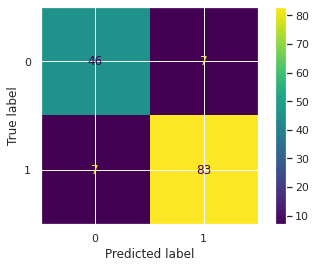

In [ ]:
plot_confusion_matrix(LR, X_test, y_test)
#sns.set(font_scale=1)
#plt.show(sns.heatmap(mc, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

# Arbol de Decision

In [ ]:
from sklearn.tree import  DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
tree.fit(X_train, y_train)
y_test_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.8601398601398601

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

mc = confusion_matrix(y_test, y_test_pred)
mc

array([[41, 12],
       [ 8, 82]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


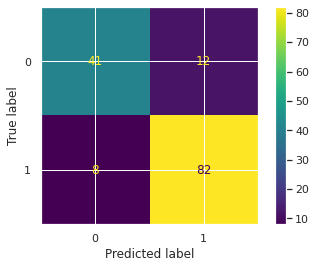

In [ ]:
plot_confusion_matrix(tree, X_test, y_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
RF.fit(X_train, y_train)
y_test_pred = RF.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.8671328671328671

In [ ]:
mc = confusion_matrix(y_test, y_test_pred)
mc

array([[43, 10],
       [ 9, 81]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


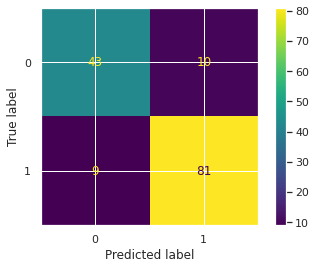

In [ ]:
plot_confusion_matrix(RF,X_test, y_test)

# Red neuronal MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()

In [ ]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

MLP.fit(X_train, y_train)
y_test_pred = MLP.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
mc = confusion_matrix(y_test, y_test_pred)
mc

array([[42, 11],
       [ 6, 84]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


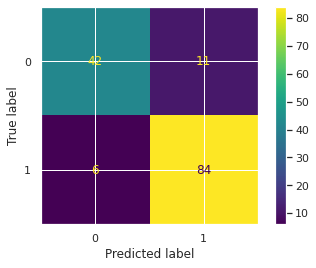

In [ ]:
plot_confusion_matrix(MLP, X_test, y_test)